In [135]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [136]:
file = 'car_fuel_efficiency.csv'
if os.path.exists(file):
    pass
else:
    !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

In [137]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [138]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [139]:
base = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year'
]

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

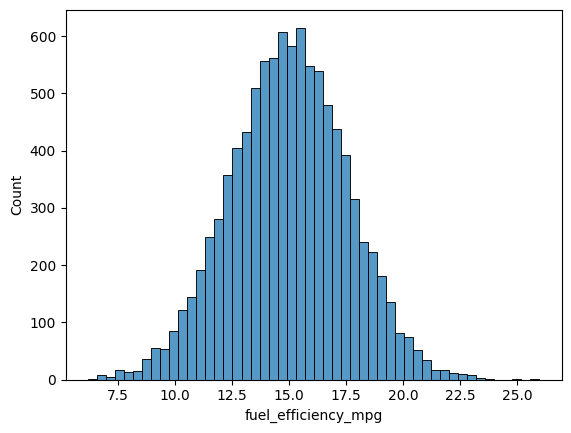

In [140]:
sns.histplot(df.fuel_efficiency_mpg, bins = 50)

## The "fuel efficiency mpg" does not have a long tail!

In [141]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [142]:
df.horsepower.describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

### Preparing the data

In [143]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [144]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369


In [145]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)

n_train = n - n_val - n_test
n, n_val+n_test+n_train, n_val, n_test, n_train 

(9704, 9704, 1940, 1940, 5824)

### Fixing the seed and splitting data

In [146]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

idx[:n_train]

array([ 483, 7506, 8795, ..., 6735, 2052, 1776], shape=(5824,))

In [147]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train : n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [148]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [149]:
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

In [150]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [151]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,220,3.0,144.0,2535.887591,18.7,2009,usa,gasoline,all-wheel_drive,2.0
1,160,2.0,141.0,2741.170484,14.3,2019,asia,diesel,front-wheel_drive,2.0
2,230,3.0,155.0,2471.880237,NaN,2017,asia,diesel,front-wheel_drive,2.0
3,150,3.0,206.0,3748.164469,15.5,2015,usa,gasoline,all-wheel_drive,1.0
4,300,4.0,111.0,2135.716359,16.9,2006,usa,gasoline,all-wheel_drive,NaN


#### filling 'horsepower' empty cells with 0 and the mean

In [152]:
df_train['horsepower'].describe()

count    5395.000000
mean      149.544764
std        29.610498
min        46.000000
25%       129.000000
50%       149.000000
75%       170.000000
max       246.000000
Name: horsepower, dtype: float64

In [153]:
df_train_hp_0 = df_train.copy()

In [154]:
df_train_hp_0['horsepower'] = df_train_hp_0['horsepower'].fillna(0)

In [155]:
df_train_hp_0.isnull().sum()

engine_displacement      0
num_cylinders          307
horsepower               0
vehicle_weight           0
acceleration           551
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              289
dtype: int64

In [156]:
df_train_hp_mean = df_train.copy()

In [157]:
hp_mean = df_train_hp_mean['horsepower'].mean()
hp_mean

np.float64(149.54476367006487)

In [158]:
df_train_hp_mean['horsepower'] = df_train_hp_mean['horsepower'].fillna(hp_mean)

In [159]:
df_train_hp_mean.isnull().sum()

engine_displacement      0
num_cylinders          307
horsepower               0
vehicle_weight           0
acceleration           551
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              289
dtype: int64

In [160]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

#### HP filled with 0

In [161]:
X_train_hp_0 = df_train_hp_0[base].values
X_train_hp_0

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [162]:
train_linear_regression(X_train_hp_0, y_train)

(np.float64(28.82736547365895),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992870e-04]))

In [163]:
w0, w = train_linear_regression(X_train_hp_0, y_train)
w0, w

(np.float64(28.82736547365895),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992870e-04]))

In [164]:
y_pred_hp_0 = w0 + X_train_hp_0.dot(w)
y_pred_hp_0

array([17.33526223, 16.29296317, 17.69885099, ..., 17.54541307,
       18.78287539, 17.86564843], shape=(5824,))

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

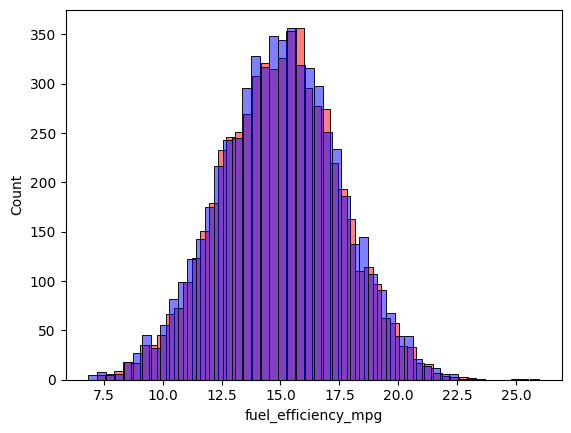

In [165]:
sns.histplot(y_pred_hp_0, color='red', bins=50, alpha=0.5)
sns.histplot(y_train, color= 'blue', bins=50, alpha=0.5)

In [189]:
def rmse(y, y_pred):
    
    error = y-y_pred
    se = error ** 2
    mse = se.mean()
    
    return round(np.sqrt(mse),2)

In [167]:
rmse(y_train, y_pred_hp_0)

np.float64(0.52)

In [168]:
X_val_hp_0 = df_val[base].values
y_pred_val = w0 + X_val_hp_0.dot(w)

rmse(y_val, y_pred_val)

np.float64(0.5)

#### HP filled with the mean

In [169]:
X_train_hp_mean = df_train_hp_mean[base].values
X_train_hp_mean

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [170]:
train_linear_regression(X_train_hp_mean, y_train)

(np.float64(28.925259951002698),
 array([ 0.00012093,  0.01030308, -0.00501009, -0.00023463]))

In [171]:
w0, w = train_linear_regression(X_train_hp_mean, y_train)
w0, w

(np.float64(28.925259951002698),
 array([ 0.00012093,  0.01030308, -0.00501009, -0.00023463]))

In [172]:
y_pred_hp_mean = w0 + X_train_hp_mean.dot(w)
rmse(y_train, y_pred_hp_mean)

np.float64(0.46)

In [173]:
X_val_hp_mean = df_val[base].values
y_pred_val = w0 + X_val_hp_mean.dot(w)

rmse(y_val, y_pred_val)

np.float64(0.45)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

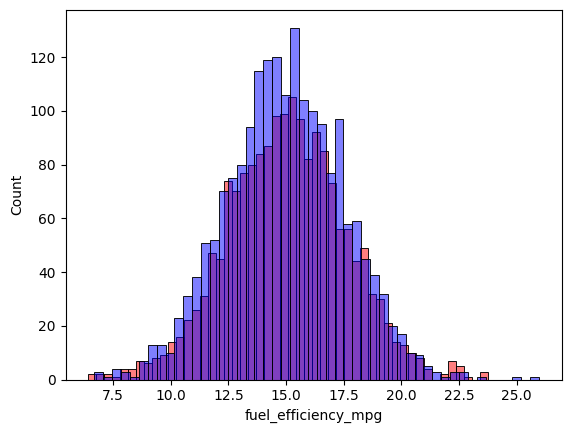

In [253]:
sns.histplot(y_pred_val, color='red', bins=50, alpha=0.5)
sns.histplot(y_val, color= 'blue', bins=50, alpha=0.5)

### The model filled with the mean had a better RMSE

## Regularizing the linear regression

In [191]:
def train_linear_regression_reg(X, y, r=0.001):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [192]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df_num = df[features]

    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [206]:
def rmse(y, y_pred):
    
    error = y-y_pred
    se = error ** 2
    mse = se.mean()
    
    return round(np.sqrt(mse),2)

In [252]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)

    print(r, w0, score)

0 27.242367018537344 0.5141
0.01 23.57354656096966 0.5145
0.1 10.656831931249089 0.5181
1 1.6447496387876526 0.5226
5 0.3456501550393841 0.5234
10 0.17393207411192352 0.5235
100 0.01750027969645859 0.5236


### Rounding the score of RMSE to 2 decimal digits give the same answers to all values of R, so 0 will be the answer. Rounding to 3 decimal digits the answer is still the same. But if we round it to 4 decimal digits, then the answer changes to 0.01

## Let's use differents seeds to randomize the dataset, seeds from 0 to 9

In [248]:
idx = np.arange(n)
rmse_scores = []

def rmse(y, y_pred):
    
    error = y-y_pred
    se = error ** 2
    mse = se.mean()
    
    return round(np.sqrt(mse),4)

    
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    np.random.seed(s)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train : n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train['fuel_efficiency_mpg']
    y_val = df_val['fuel_efficiency_mpg']
    y_test = df_test['fuel_efficiency_mpg']
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)

    rmse_scores.append(score)
    

In [249]:
rmse_scores

[np.float64(0.5207),
 np.float64(0.5228),
 np.float64(0.5168),
 np.float64(0.5257),
 np.float64(0.5214),
 np.float64(0.5251),
 np.float64(0.5256),
 np.float64(0.5068),
 np.float64(0.5201),
 np.float64(0.5141)]

In [250]:
np.std(rmse_scores)

np.float64(0.005651274192604692)

In [251]:
round(np.std(rmse_scores),3)

np.float64(0.006)

### The std for the scores are 0.006

## Using the seed value of 9, combining train and validation sets and using regularization with r=0.001

In [241]:
idx = np.arange(n)   
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train : n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

def rmse(y, y_pred):
    
    error = y-y_pred
    se = error ** 2
    mse = se.mean()
    
    return np.sqrt(mse)


df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

y_full_train = np.concatenate([y_train, y_val])

X_full_train = prepare_X(df_full_train)
w0, w = train_linear_regression(X_full_train, y_full_train)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

rmse(y_test, y_pred)

    

np.float64(0.5156132022024005)

## The RMSE is 0.515

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

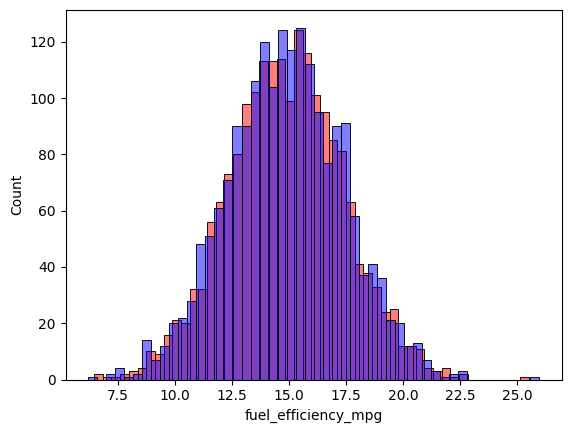

In [243]:
sns.histplot(y_pred, color='red', bins=50, alpha=0.5)
sns.histplot(y_test, color= 'blue', bins=50, alpha=0.5)